# (실습-4) 임베딩 생성 API 실습

##실습 개요
1) 실습 목적 <br>
  이번 실습에서는 SentenceBERT와 OpenAI API를 이용하여 임베딩을 생성해 본다. <br>
  다양한 문장에 따라 임베딩 결과가 어떻게 나타나는지 확인한다. <br>
2) 수강 목표
  * SentenceBERT를 이용하여 Embedding을 생성할 수 있다.
  * OpenAI API를 이용하여 Embedding을 생성할 수 있다.
  * 실제 문장 샘플에 대한 유사도 결과의 분포를 비교 분석한다.

### 실습 목차
* 1. SentenceBERT Embeddings
* 2. OpenAI Embeddings

### 환경 설정
임베딩 생성을 위한 샘플 테스트 문장을 준비한다.

In [1]:
# 임베딩 테스트를 위한 예시 문장
short_sentences = [
    "겨울에는 따뜻한 옷을 입는다.",
    "추운날은 두꺼운 외투가 필요하다.",
    "인공지능은 기술 발전의 부산물이다.",
    "AI는 인류에게 유용한 기술이다.",
    "AI는 인류에게 위험한 기술이다.",
    "패스트캠퍼스 강의는 유용하다.",
]

long_sentences = [
    "겨울이 되면 눈이 내려서 거리가 하얗게 변하고 사람들은 따뜻한 옷을 입는다.",
    "하얀 눈이 내리면서 도시가 은빛 세상으로 변하고, 사람들은 두꺼운 외투를 입는다.",
    "인공지능은 과학 기술의 진보, 데이터 처리 능력의 향상, 그리고 복잡한 문제 해결을 위한 새로운 접근 방식의 필요성이 결합된 결과이다.",
    "인공지능은 단순히 기술의 발전을 넘어서 인류의 삶을 개선하고, 더 나은 미래를 구축하는 데 필수적인 역할을 하고 있다.",
    "인공지능은 인류에게 잠재적인 위험 요소를 내포하는 기술로, 그 사용과 발전에 있어 신중한 접근이 필요하다.",
    "패스트캠퍼스의 강의는 실무 중심의 커리큘럼을 제공하여, 현업에서 바로 활용할 수 있는 실용적인 지식과 기술을 습득할 수 있다"
]

all_sentences = short_sentences + long_sentences

## 1. SentenceBERT Embeddings

In [2]:
# Python 패키지 설치
%pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [5]:
# 시각화를 위한 라이브러리 import
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Sentence Transformer를 통해 모델을 로드하고 문장들을 벡터로 인코딩합니다
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
sb_vectors = model.encode(all_sentences)

# 문장 벡터들 간의 코사인 유사도를 계산합니다
sb_short_similarities = util.cos_sim(sb_vectors[:6], sb_vectors[:6])
sb_long_similarities = util.cos_sim(sb_vectors[6:], sb_vectors[6:])
sb_similarities = util.cos_sim(sb_vectors, sb_vectors)

/home/pervinco/miniconda3/envs/nlp-project/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/home/pervinco/miniconda3/envs/nlp-project/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

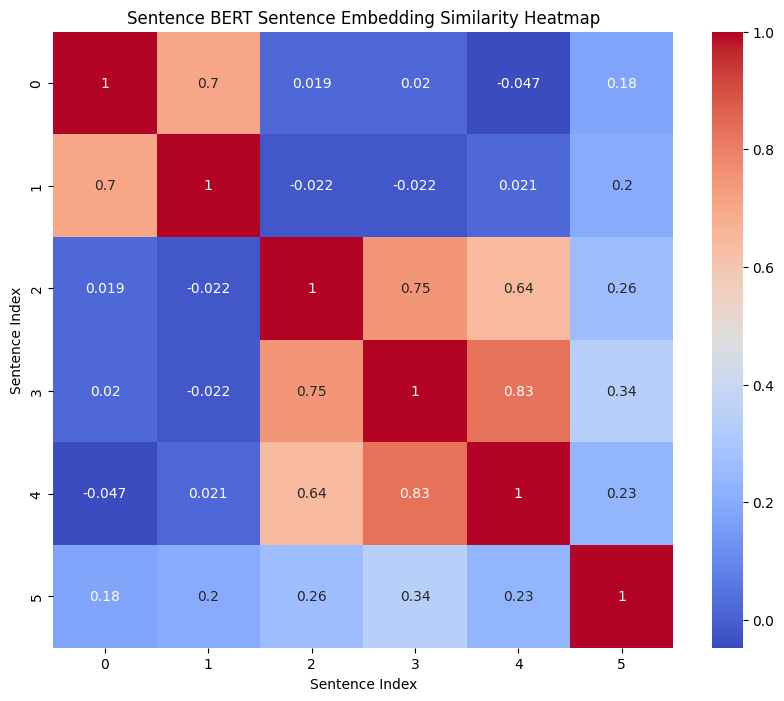

In [6]:
# 유사도 행렬의 히트맵을 시각화합니다 (short sentences)
plt.figure(figsize=(10, 8))
sns.heatmap(sb_short_similarities, annot=True, cmap='coolwarm')
plt.title("Sentence BERT Sentence Embedding Similarity Heatmap")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()

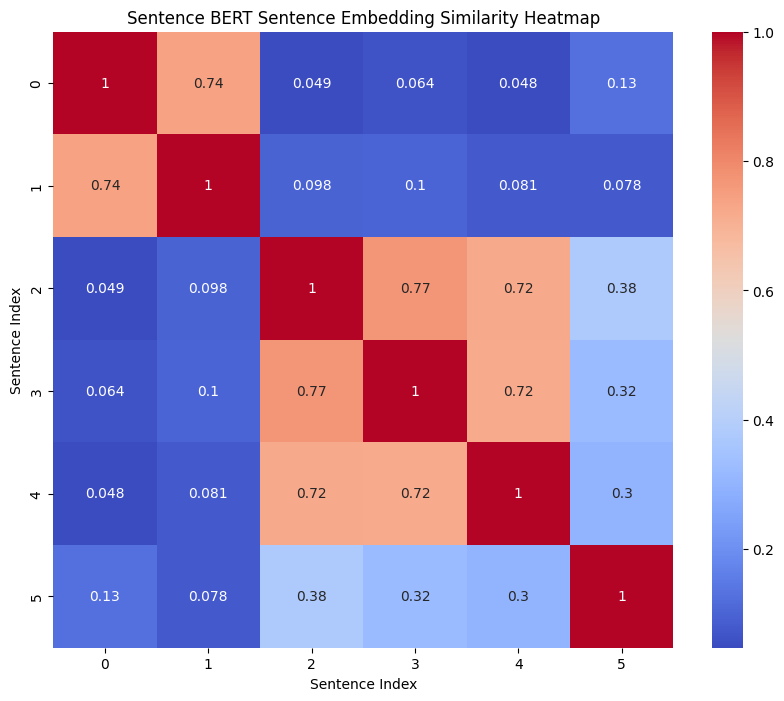

In [8]:
# 유사도 행렬의 히트맵을 시각화합니다 (long sentences)
plt.figure(figsize=(10, 8))
sns.heatmap(sb_long_similarities, annot=True, cmap='coolwarm')
plt.title("Sentence BERT Sentence Embedding Similarity Heatmap")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()

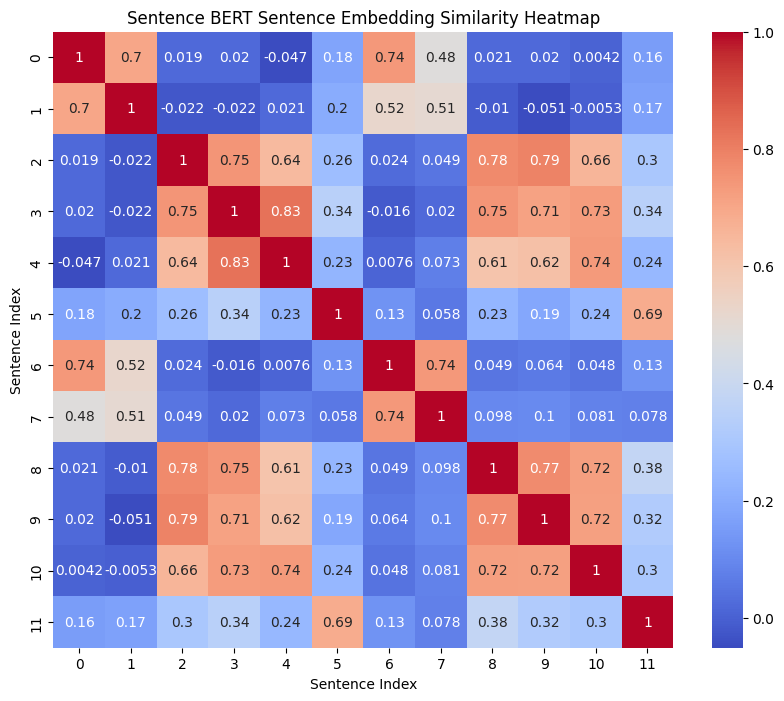

In [9]:
# 유사도 행렬의 히트맵을 시각화합니다 (all sentences)
plt.figure(figsize=(10, 8))
sns.heatmap(sb_similarities, annot=True, cmap='coolwarm')
plt.title("Sentence BERT Sentence Embedding Similarity Heatmap")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()

## 2. OpenAI Embeddings

In [1]:
# Python 패키지 설치
%pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [2]:
import os

# OpenAI API Key 필요
os.environ["OPENAI_API_KEY"] = ""

In [4]:
# OpenAI API를 활용한 임베딩 생성 함수 정의

from openai import OpenAI
import torch
client = OpenAI()

def get_embedding(text, model="text-embedding-ada-002"):
   return client.embeddings.create(input=[text], model=model).data[0].embedding

def texts_to_tensor(texts, model="text-embedding-ada-002"):
    embeddings = [get_embedding(text, model) for text in texts]
    return torch.tensor(embeddings)


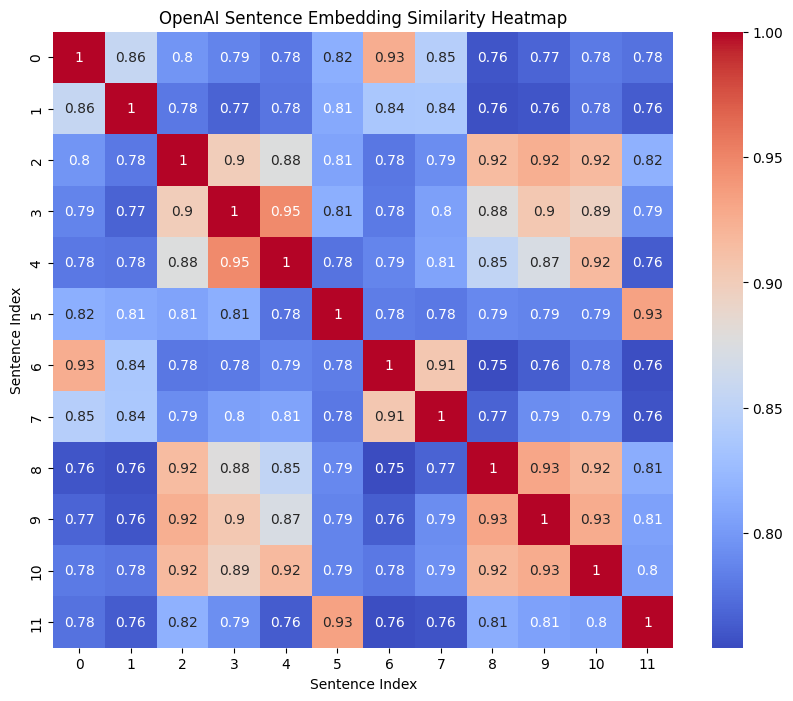

In [11]:
# OpenAI API로 임베딩을 생성합니다
openai_vectors = texts_to_tensor(all_sentences)

# 문장 벡터들 간의 코사인 유사도를 계산합니다
openai_similarities = util.cos_sim(openai_vectors, openai_vectors)

# 유사도 행렬의 히트맵을 시각화합니다
plt.figure(figsize=(10, 8))
sns.heatmap(openai_similarities, annot=True, cmap='coolwarm')
plt.title("OpenAI Sentence Embedding Similarity Heatmap")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()

#Reference

## Required Package

tiktoken==0.3.3 <br>
openai==1.7.2 <br>
sentence_transformers=2.2.2 <br>
